# Tutorial: Multi-armed bandit algorithms

This is a coding based tutorial on multi-armed bandit algorithms. We will code and discuss following algorithms:
* $\epsilon$-greedy
* Upper confidence bound~(UCB)
* KL-UCB
* Thompson Sampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class MAB:
    def __init__(self, mean, variance):
        self.mean = mean
        self.var = variance
        self.n = len(mean)
        self.estimate = np.zeros((self.n))
        self.times_pulled = np.zeros((self.n))
    
    def init(self):
        self.estimate = np.zeros((self.n))
        self.times_pulled = np.zeros((self.n))
        
    def pull(self, arm):
        reward = np.random.normal(self.mean[arm], self.var[arm])
        self.estimate[arm] = (reward + self.times_pulled[arm]*self.estimate[arm])/(self.times_pulled[arm] + 1)
        self.times_pulled[arm] += 1
        return reward

In [ ]:
def eps_greedy(estimate, times_pulled, eps=0.05):
    if np.any(times_pulled==0):
        return np.where(times_pulled==0)[0][0]
    key = int(np.random.uniform()<eps)
    return key*np.random.randint(len(estimate)) + (1-key)*np.argmax(estimate)

def ucb(estimate, times_pulled, delta=0.05):
    if np.any(times_pulled==0):
        return np.where(times_pulled==0)[0][0]
    ucb_criteria = estimate + np.sqrt(2*np.log(1/delta)/times_pulled)
    return np.argmax(ucb_criteria)

In [ ]:
mean = [0.79, 0.87, 0.9, 0.8]
var = [0.1, 0.5, 0.15, 0.1]
opt_avg_reward = 0.9
epsilon = [0, 0.02, 0.05, 0.1, 0.2]
deltas = [0.01, 0.1, 0.2, 0.4, 0.6, 0.9, 0.05]
avg_over = 100
T = 10000

In [ ]:
slot_machine = MAB(mean, var)

In [ ]:
print(slot_machine.mean, slot_machine.var, slot_machine.n, slot_machine.estimate, slot_machine.times_pulled)

[0.79, 0.87, 0.9, 0.8] [0.1, 0.5, 0.15, 0.1] 4 [0. 0. 0. 0.] [0. 0. 0. 0.]


In [ ]:
avg_regrets = np.zeros((len(epsilon), T))
for indx, eps in enumerate(epsilon):
    regrets = np.zeros((avg_over, T))
    for run in range(avg_over):
        rewards = []
        regret = []
        slot_machine.init()
        for t in range(T):
            arm = eps_greedy(slot_machine.estimate, slot_machine.times_pulled, eps)
            reward = slot_machine.pull(arm)
            rewards.append(reward)
            regret.append((t+1)*opt_avg_reward - sum(rewards))
        regrets[run] = regret
    avg_regrets[indx] = np.mean(regrets, axis=0)

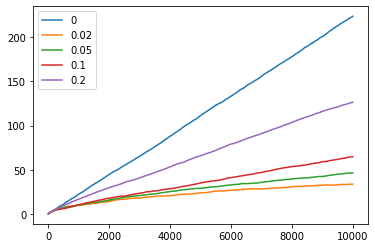

In [ ]:
for indx, eps in enumerate(epsilon):
    plt.plot(np.arange(1,T+1),avg_regrets[indx],label=str(eps))
    plt.legend()

In [ ]:
avg_regrets = np.zeros((len(deltas), T))
for indx, delta in enumerate(deltas):
    regrets = np.zeros((avg_over, T))
    for run in range(avg_over):
        rewards = []
        regret = []
        slot_machine.init()
        for t in range(T):
            arm = ucb(slot_machine.estimate, slot_machine.times_pulled, delta)
            reward = slot_machine.pull(arm)
            rewards.append(reward)
            regret.append((t+1)*opt_avg_reward - sum(rewards))
        regrets[run] = regret
    avg_regrets[indx] = np.mean(regrets, axis=0)

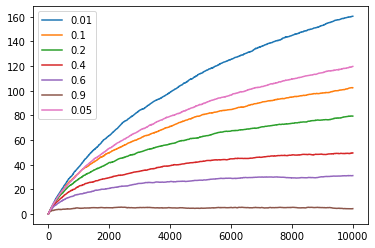

In [ ]:
for indx, delta in enumerate(deltas):
    plt.plot(np.arange(1,T+1),avg_regrets[indx],label=str(delta))
    plt.legend()